# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

In this exercise we will test the function of ANN as an universal approximator. 
We will use a simply ANN consisting of two  neurons in a hidden layer. 

We use the `tanh` activation function in the neuron. It can only approximate similar to a monotonic function. When we apply two neurons in a pair, they would be able to approximate an up-hill-then-downhill non monotonic function. 
This is a function with a single maximum.


Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


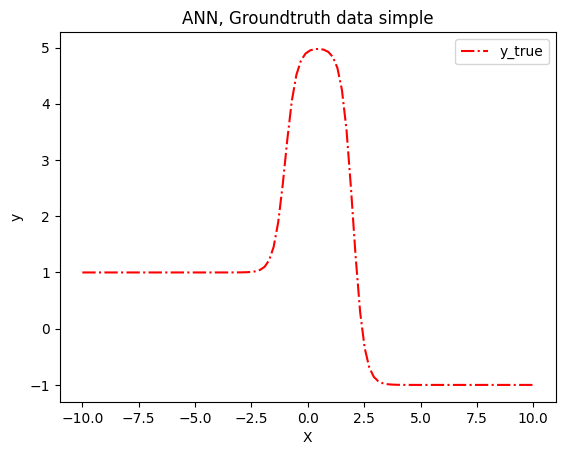

In [1]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

We will fit the data generator and MLP in the layer 2. Them `y_true` and `y_pred` are plotted in a graph

In [2]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X) 

# Extract weights and biases
weights = mlp.coefs_

biases = mlp.intercepts_
print("weights:")
print(weights)
print("biases:")
print(biases)

print("OK")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54561D+00    |proj g|=  2.12104D+00

At iterate    1    f=  2.81278D+00    |proj g|=  1.28782D+00

At iterate    2    f=  1.49640D+00    |proj g|=  3.59921D-01

At iterate    3    f=  1.29508D+00    |proj g|=  3.40206D-01

At iterate    4    f=  1.07897D+00    |proj g|=  4.93399D-01

At iterate    5    f=  9.40972D-01    |proj g|=  2.38175D-01

At iterate    6    f=  7.97677D-01    |proj g|=  1.78578D-01
weights:
[array([[-1.99713594, -2.00059515]]), array([[-2.0002981 ],
       [ 3.00017244]])]
biases:
[array([-1.99703334,  4.00113497]), array([-0.00011715])]
OK

At iterate    7    f=  7.59937D-01    |proj g|=  1.08049D-01

At iterate    8    f=  7.27653D-01    |proj g|=  3.61323D-01

At iterate    9    f=  6.91454D-01    |proj g|=  2.70481D-01

At iterate   10    f=  5.85840D-01    |proj g|=  3

 This problem is unconstrained.


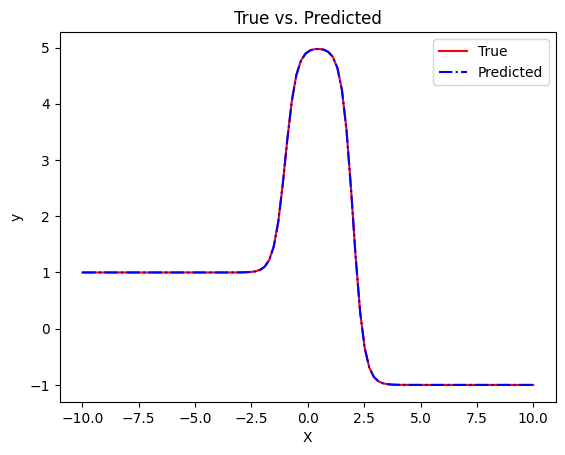

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y_true, "r", label="True")
plt.plot(X, y_pred, "b-.", label="Predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("True vs. Predicted")
plt.show()


#### Qb)

This drawing below illustrates the ANN with its input-, hidden- and output-layer

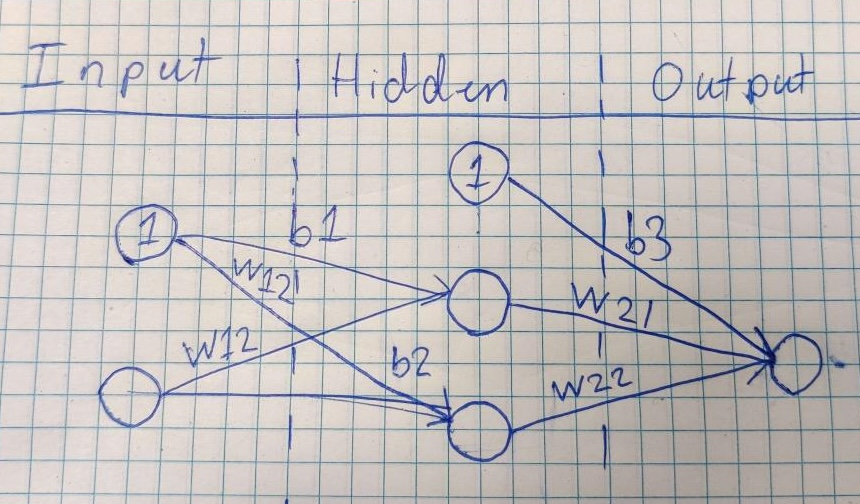

In [17]:
from IPython.display import Image

Image(filename="./Figs/ANN_drawing.jpg", width=500, height=500)

#### Qc)

First we extract the weights and biases into individual parameters so we can use them for the formula. Thereafter we use the formula activationFunction 
    
    (weight*x+bias) 

to find the output for each individual neuron.

weights:
[array([[-1.99713594, -2.00059515]]), array([[-2.0002981 ],
       [ 3.00017244]])]
biases:
[array([-1.99703334,  4.00113497]), array([-0.00011715])]
w11 = -1.9971359438890637
w12 = -2.0005951477850177
w21 = [-2.0002981]
w22 = [3.00017244]
b1 = -1.9970333427978824
b2 = 4.001134972431664
b3 = -0.00011715051468759583
For x = 1.5, y_math = [4.28521565]
mlp_sample_prediction:
[4.28521565]


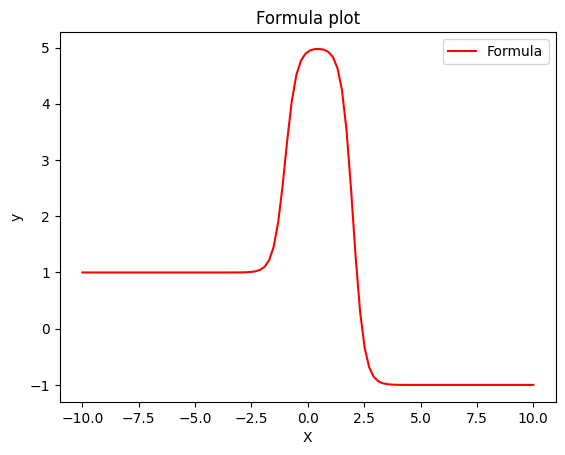

In [4]:
# Extracted weights and biases
import numpy as np
# Extract the weights and biases
w11, w12 = weights[0][0]
w21 = weights[1][0]
w22 = weights[1][1]

b1, b2 = biases[0]
b3 = biases[1][0]

print("weights:")
print(weights)
print("biases:")
print(biases)
# Print the extracted parameters
print("w11 =", w11)
print("w12 =", w12)
print("w21 =", w21)
print("w22 =", w22)
print("b1 =", b1)
print("b2 =", b2)
print("b3 =", b3)

# Define the mathematical formula
def network_formula(x):
    return (w21*np.tanh(w11*x+b1) + w22*np.tanh(w12*x+b2))+b3

# Test the formula with a sample input
x_sample = 1.5
y_sample = network_formula(x_sample)

print(f"For x = {x_sample}, y_math = {y_sample}")

mlp_sample_prediction= mlp.predict([[x_sample]])

print("mlp_sample_prediction:")
print(mlp_sample_prediction)


plt.plot(X, network_formula(X), "r", label="Formula")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula plot")
plt.show()


As we can see from the sample we get exactly the same from the formula as from the MLP prediction, and when we plot it it looks just like the MLP plot

#### Qd)

Here we compare the Math formula with the MLP-predicted values as well as the ground truth. We can see that they are almost exactly alike.


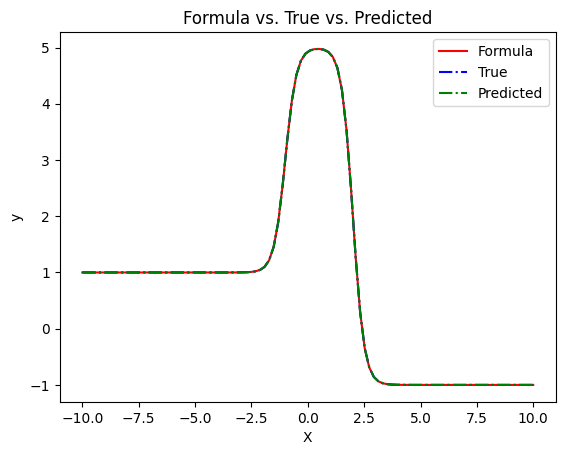

In [5]:

plt.plot(X, network_formula(X), "r", label="Formula")
plt.plot(X, y_true, "b-.", label="True")
plt.plot(X, y_pred, "g-.", label="Predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula vs. True vs. Predicted")
plt.show()


#### Qe)

The first half of the ala function is plotted: 

        y_math_first_part = 0.3* tanh(2 * X + 0.1)

The next part is then plotted. Then the two will be summed, this is the `y_math``



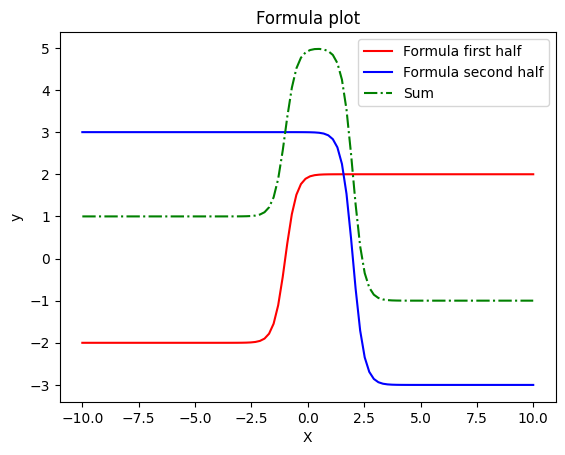

In [6]:
def network_formula_first_half(x):
    return (w21*np.tanh(w11*x+b1))

def network_formula_second_half(x):
    return (w22*np.tanh(w12*x+b2))

sum = network_formula_first_half(X) + network_formula_second_half(X) +b3
plt.plot(X, network_formula_first_half(X), "r", label="Formula first half")
plt.plot(X, network_formula_second_half(X), "b", label="Formula second half")
plt.plot(X, sum, "g-.", label="Sum")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Formula plot")
plt.show()




On the plot we can see that the graph for the individual neurons in the MLP exhibit traits very similar to a monotonic tanh activation function since they bot go exclusivlely one direction. However they go in the oposite direction, and therefore it totals to the correct function. This works since the function isn't very complex, but if we had to analyze a more complex system we would need more neurons who would all have traits like these and then it would total to the more complex function. 

#### Qf)

The data generator is changed to a function, that needs a NN with a higher capacity than the previous simple data


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          136     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25725D-01    |proj g|=  3.15985D-01

At iterate    1    f=  7.25672D-02    |proj g|=  5.08921D-02

At iterate    2    f=  7.09009D-02    |proj g|=  3.38003D-02

At iterate    3    f=  6.97243D-02    |proj g|=  2.67342D-02

At iterate    4    f=  6.49373D-02    |proj g|=  6.54392D-02

At iterate    5    f=  6.05232D-02    |proj g|=  6.65191D-02

At iterate    6    f=  5.15200D-02    |proj g|=  5.59629D-02

At iterate    7    f=  3.94341D-02    |proj g|=  1.31586D-01

At iterate    8    f=  3.57213D-02    |proj g|=  9.17887D-02

At iterate    9    f=  3.25135D-02    |proj g|=  9.12337D-02

At iterate   10    f=  2.57660D-02    |proj g|=  1.11953D-01

At iterate   11    f=  1.79711D-02    |proj g|=  7.65444D-02

At iterate   12    f=  1.29196D-02    |proj g|=  2.74163D-02

At iterate   13    f=  1.1

Text(0.5, 1.0, 'ANN, Groundtruth data for Sinc')

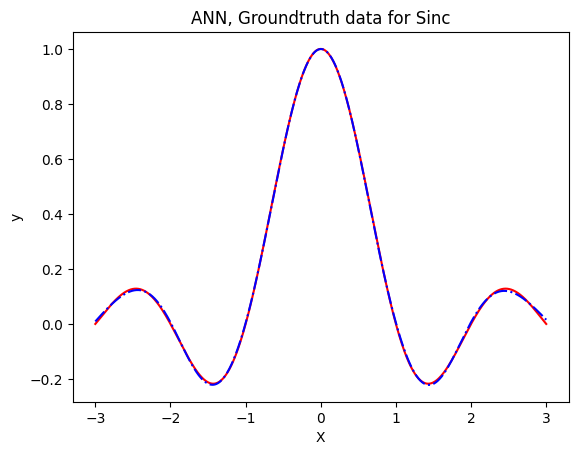

In [7]:


def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()


mlp2 = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [5,5,5,5,5], # layes and neurons in layers: 5 hidden layers with 5 neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)
mlp2.fit(X, y_true)
y_pred_sinc = mlp2.predict(X)

plt.plot(X, y_true, "r-")
plt.plot(X, y_pred_sinc, "b-.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")


As you can see, the graph shows a good representation of the sinc-function